# Project Proposal Goup 8

## Statistically Inferring the Difference in Proportions of Break and Enter Type Crimes Between Kerisdale and Oakridge

#### Introduction

insert introduction here

Note that the estimator used in this project is a difference in proportions calculated from a data set containing the types of crime occuring in various neighbourhoods throughout Vancouver. In this case, a scale parameter (i.e. standard deviation, inter-quartile range, etc.) cannot be hypothesized because the raw data is not composed of numerical values. 

#### Preliminary Results

In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(infer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# This data frame contains crime data from the year 2022 for a multitude of different neighborboods
all_crime <- read.csv("https://github.com/nehamenon704/stat201project/raw/main/crimedata_csv_AllNeighbourhoods_2022.csv")
head(all_crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2022,1,3,16,19,10XX ALBERNI ST,West End,491036.1,5459146
2,Break and Enter Commercial,2022,6,17,5,16,10XX ALBERNI ST,West End,491067.3,5459115
3,Break and Enter Commercial,2022,3,15,5,14,10XX ALBERNI ST,West End,491102.2,5459092
4,Break and Enter Commercial,2022,3,19,6,42,10XX ALBERNI ST,West End,491102.2,5459092
5,Break and Enter Commercial,2022,2,23,23,0,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
6,Break and Enter Commercial,2022,2,25,10,15,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444


In [3]:
# This reduced data set contains only break and enter type crime during the year of 2022
# There are originally commercial and residential/other types of break and enter, but this gets generalized to 'Break and Enter' for simplicity
# kerisdale and oak ridge 

crime <- all_crime %>%
    select(TYPE, NEIGHBOURHOOD) 
crime$TYPE <- replace(crime$TYPE, crime$TYPE == 'Break and Enter Commercial', 'Break and Enter')
crime$TYPE <- replace(crime$TYPE, crime$TYPE == 'Break and Enter Residential/Other', 'Break and Enter')
head(crime)

,TYPE,NEIGHBOURHOOD
,<chr>,<chr>
1,Break and Enter,West End
2,Break and Enter,West End
3,Break and Enter,West End
4,Break and Enter,West End
5,Break and Enter,Shaughnessy
6,Break and Enter,Shaughnessy


The following cell calculates the proportion of break and enters for each Vancouver Neighbourhood.  

In [4]:
prop_bne <- crime %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(n = n(), prop = sum(TYPE == 'Break and Enter') / n)  
prop_bne

NEIGHBOURHOOD,n,prop
<chr>,<int>,<dbl>
,4,0.00000000
Arbutus Ridge,349,0.15472779
Central Business District,10615,0.06773434
Dunbar-Southlands,323,0.15170279
Fairview,1676,0.11813842
Grandview-Woodland,1525,0.12459016
Hastings-Sunrise,954,0.13312369
Kensington-Cedar Cottage,1452,0.09986226
Kerrisdale,339,0.21533923


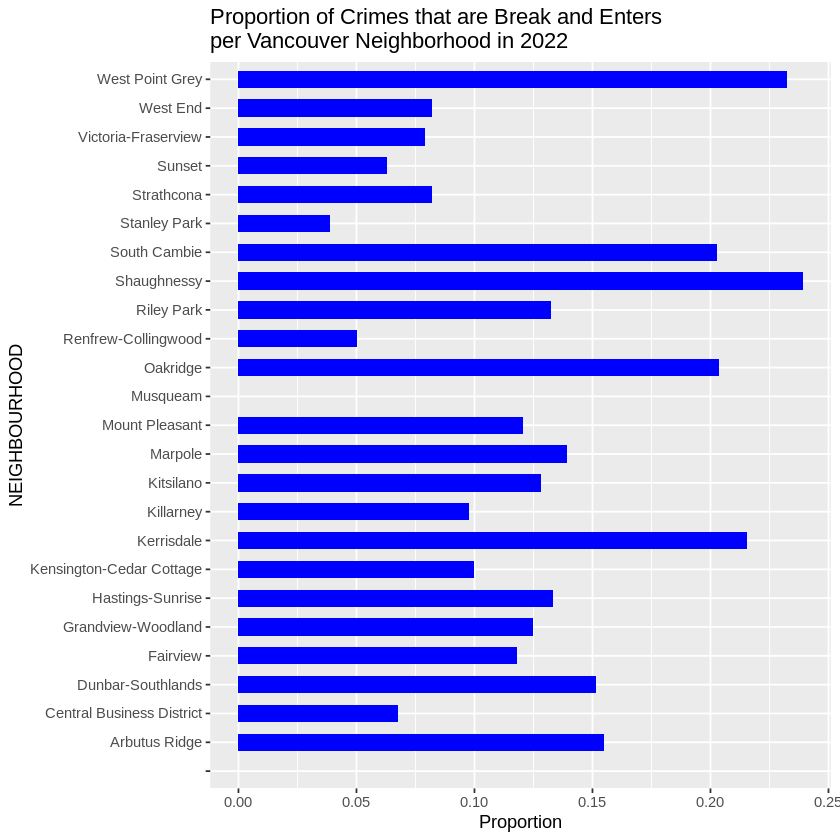

In [5]:
plot_prop_bne <- prop_bne %>%
    ggplot() +
    geom_col(aes(prop, NEIGHBOURHOOD), fill = 'blue', width = 0.6) +
    labs(x = 'Proportion', title = 'Proportion of Crimes that are Break and Enters \nper Vancouver Neighborhood in 2022')
plot_prop_bne

This code cell produces a pie chart containing the proportion of all the types of crime for each Vancouver neighbourhood we are wanting to analyse. 

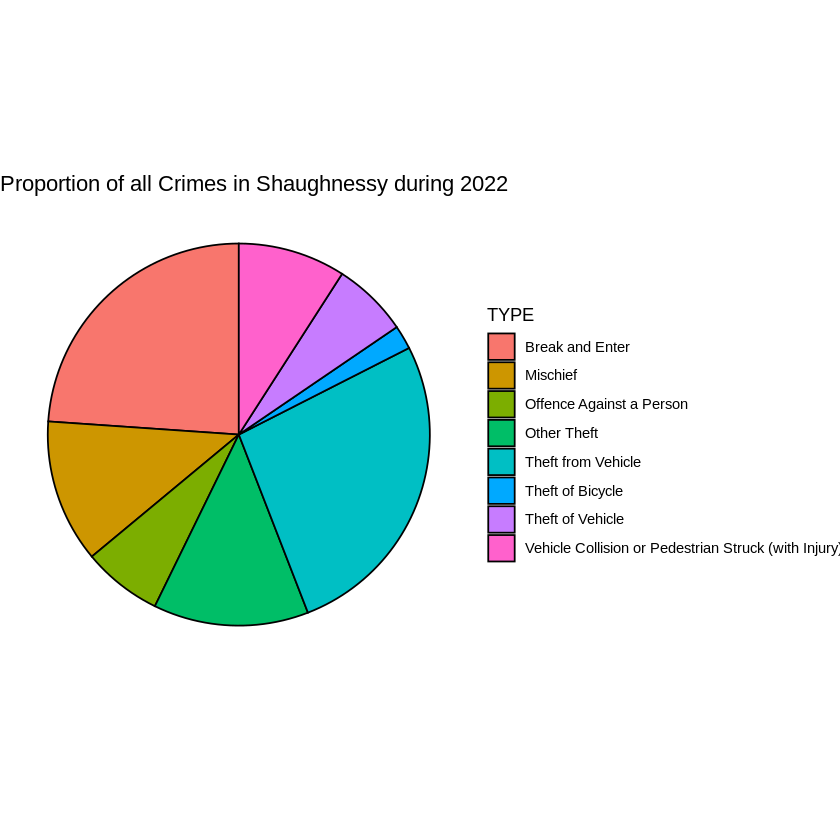

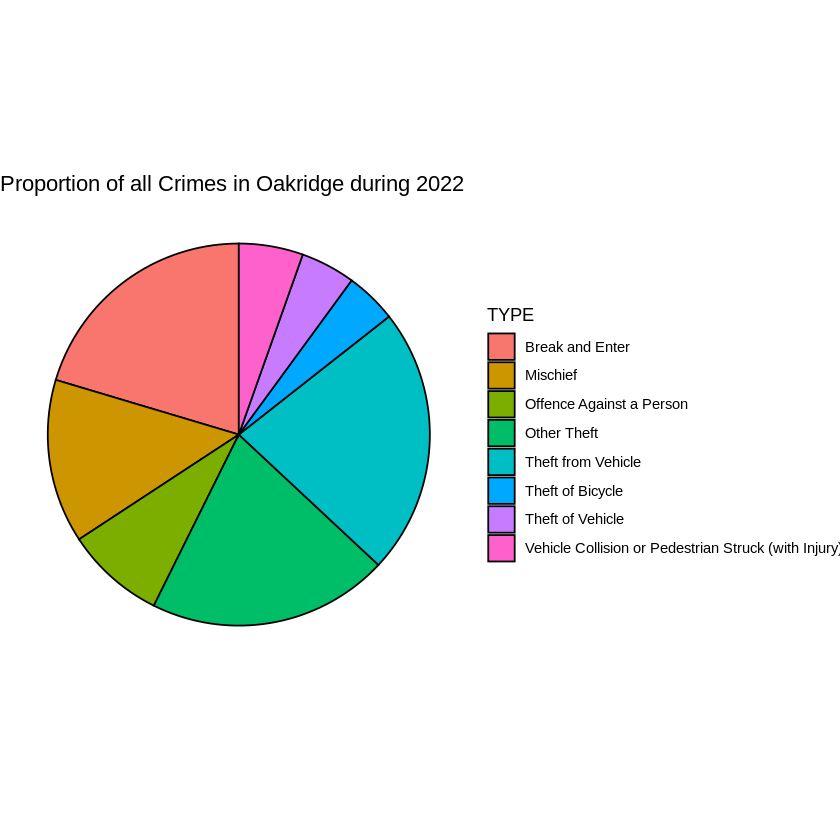

In [27]:
# total number of crimes in this neighbourhood
total_crime_shaughnessy <- crime %>%
    summarize(sum = sum(NEIGHBOURHOOD == 'Shaughnessy')) %>%
    pull()

total_crime_oakridge <- crime %>%
    summarize(sum = sum(NEIGHBOURHOOD == 'Kitsilano')) %>%
    pull()

crime_shaughnessy <- crime %>%
    filter(NEIGHBOURHOOD == 'Shaughnessy') %>%
    group_by(TYPE) %>%
    summarize(prop = n() / total_crime_shaughnessy) 

crime_oakridge <- crime %>%
    filter(NEIGHBOURHOOD == 'Oakridge') %>%
    group_by(TYPE) %>%
    summarize(prop = n() / total_crime_oakridge) 

plot_crime_type_shaughnessy <- crime_shaughnessy %>%
    ggplot(aes(x="", y=prop, fill=TYPE)) +
    geom_bar(stat="identity", width=1, color='black') +
    coord_polar("y", start=0) +
    labs(title = 'Proportion of all Crimes in Shaughnessy during 2022') +
    theme_void()

plot_crime_type_oakridge <- crime_oakridge %>%
    ggplot(aes(x="", y=prop, fill=TYPE)) +
    geom_bar(stat="identity", width=1, color='black') +
    coord_polar("y", start=0) +
    labs(title = 'Proportion of all Crimes in Oakridge during 2022') +
    theme_void()

plot_crime_type_shaughnessy
plot_crime_type_oakridge

#### Methods

#### References